In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('air-quality-india.csv')

In [45]:
data.head()

Timestamp  Year  Month  Day  Hour   PM2.5
0  2017-11-07 12:00:00  2017     11    7    12   64.51
1  2017-11-07 13:00:00  2017     11    7    13   69.95
2  2017-11-07 14:00:00  2017     11    7    14   92.79
3  2017-11-07 15:00:00  2017     11    7    15  109.66
4  2017-11-07 16:00:00  2017     11    7    16  116.50

In [6]:
data.shape

(36192, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


Convert 'Timestamp' to datetime

In [10]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  36192 non-null  datetime64[ns]
 1   Year       36192 non-null  int64         
 2   Month      36192 non-null  int64         
 3   Day        36192 non-null  int64         
 4   Hour       36192 non-null  int64         
 5   PM2.5      36192 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.7 MB


Summary statistics

In [13]:
print(data.describe())

               Year         Month           Day          Hour         PM2.5
count  36192.000000  36192.000000  36192.000000  36192.000000  36192.000000
mean    2019.682278      6.331841     15.716401     11.477840     49.308429
std        1.345011      3.593321      8.859769      6.925088     24.863511
min     2017.000000      1.000000      1.000000      0.000000      7.020000
25%     2019.000000      3.000000      8.000000      5.000000     28.080000
50%     2020.000000      6.000000     16.000000     11.000000     45.730000
75%     2021.000000     10.000000     23.000000     17.000000     64.520000
max     2022.000000     12.000000     31.000000     23.000000    245.630000


In [14]:
# Trends over time
annual_avg = data.groupby('Year')['PM2.5'].mean()
print(annual_avg)

Year
2017    95.064160
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
2022    50.025717
Name: PM2.5, dtype: float64


In [15]:
monthly_avg = data.groupby(['Year', 'Month'])['PM2.5'].mean().unstack()
print(monthly_avg)

Month         1          2          3          4          5          6   \
Year                                                                      
2017         NaN        NaN        NaN        NaN        NaN        NaN   
2018   94.057636  72.531757  64.846855  53.167152  42.868204  36.967149   
2019   84.319392  61.953638  50.699781  43.689677  42.393153  29.697092   
2020   64.713284  57.907011  37.829973  31.234513  28.061344  22.197667   
2021   74.177043  64.303021  54.611844  44.070196  29.273457  25.817284   
2022   60.122899  51.466511  53.019113  45.147594  40.568052  40.635227   

Month         7          8          9          10         11         12  
Year                                                                     
2017         NaN        NaN        NaN        NaN  97.713945  93.203757  
2018   25.196940  26.154884  30.316574  56.319222  76.421659  82.782523  
2019   22.994767  19.328752  21.500000  46.173852  68.885069  71.856802  
2020   19.569976  17.241909  

In [16]:
data = data.dropna(subset=['PM2.5'])
data

Timestamp  Year  Month  Day  Hour   PM2.5
0     2017-11-07 12:00:00  2017     11    7    12   64.51
1     2017-11-07 13:00:00  2017     11    7    13   69.95
2     2017-11-07 14:00:00  2017     11    7    14   92.79
3     2017-11-07 15:00:00  2017     11    7    15  109.66
4     2017-11-07 16:00:00  2017     11    7    16  116.50
...                   ...   ...    ...  ...   ...     ...
36187 2022-06-04 11:00:00  2022      6    4    11   35.89
36188 2022-06-04 12:00:00  2022      6    4    12   33.83
36189 2022-06-04 13:00:00  2022      6    4    13   33.05
36190 2022-06-04 14:00:00  2022      6    4    14   35.29
36191 2022-06-04 15:00:00  2022      6    4    15   40.67

[36192 rows x 6 columns]

In [18]:
print(monthly_avg.isna().sum())

Month
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    1
12    1
dtype: int64


In [19]:
# Fill NaNs with the overall mean of PM 2.5 levels
overall_mean = data['PM2.5'].mean()
monthly_avg_filled = monthly_avg.fillna(overall_mean)

# Verify that there are no more NaNs
print(monthly_avg_filled.isna().sum())

Month
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


In [20]:
print(monthly_avg_filled)

Month         1          2          3          4          5          6   \
Year                                                                      
2017   49.308429  49.308429  49.308429  49.308429  49.308429  49.308429   
2018   94.057636  72.531757  64.846855  53.167152  42.868204  36.967149   
2019   84.319392  61.953638  50.699781  43.689677  42.393153  29.697092   
2020   64.713284  57.907011  37.829973  31.234513  28.061344  22.197667   
2021   74.177043  64.303021  54.611844  44.070196  29.273457  25.817284   
2022   60.122899  51.466511  53.019113  45.147594  40.568052  40.635227   

Month         7          8          9          10         11         12  
Year                                                                     
2017   49.308429  49.308429  49.308429  49.308429  97.713945  93.203757  
2018   25.196940  26.154884  30.316574  56.319222  76.421659  82.782523  
2019   22.994767  19.328752  21.500000  46.173852  68.885069  71.856802  
2020   19.569976  17.241909  

# Statistical Analysis

#For Each Year

In [21]:
# Calculate mean, median, max, min PM2.5 levels for each year
yearly_stats = data.groupby('Year')['PM2.5'].agg(['mean', 'median', 'max', 'min'])
print(yearly_stats)

           mean  median     max    min
Year                                  
2017  95.064160   93.19  158.30  42.85
2018  54.468449   50.32  245.63  16.23
2019  49.511273   46.11  234.83   7.02
2020  42.386302   35.79  196.88  10.45
2021  44.850633   42.08  134.54  12.34
2022  50.025717   48.69  115.03  25.76


For each month

In [22]:
# Calculate mean, median, max, min PM2.5 levels for each month
monthly_stats = data.groupby(['Year', 'Month'])['PM2.5'].agg(['mean', 'median', 'max', 'min'])
print(monthly_stats)

                 mean  median     max    min
Year Month                                  
2017 11     97.713945  96.860  153.42  48.98
     12     93.203757  91.510  158.30  42.85
2018 1      94.057636  91.840  177.58  53.57
     2      72.531757  71.635  114.70  36.34
     3      64.846855  63.345  104.00  35.41
     4      53.167152  52.240   89.03  28.90
     5      42.868204  42.400   60.42  27.44
     6      36.967149  35.850   73.05  18.32
     7      25.196940  24.610   39.81  16.23
     8      26.154884  24.530   71.72  16.81
     9      30.316574  29.070   51.40  16.76
     10     56.319222  55.830  107.50  30.73
     11     76.421659  73.980  245.63  36.56
     12     82.782523  82.410  149.87  42.33
2019 1      84.319392  83.220  165.82  40.55
     2      61.953638  60.370  111.48  28.72
     3      50.699781  50.900   85.77  25.72
     4      43.689677  43.670   74.12  24.60
     5      42.393153  41.620   71.82  20.98
     6      29.697092  29.370   49.43  10.31
     7    

For Each Day

In [23]:
# Calculate mean, median, max, min PM2.5 levels for each day
daily_stats = data.groupby(['Year', 'Month', 'Day'])['PM2.5'].agg(['mean', 'median', 'max', 'min'])
print(daily_stats)

                      mean   median     max    min
Year Month Day                                    
2017 11    7     99.805833  103.275  124.21  64.51
           8    110.979565  110.230  148.35  83.82
           9    114.915833  115.940  140.76  88.72
           10   119.404091  121.475  151.05  78.79
           11   109.267273  114.390  135.18  73.27
...                    ...      ...     ...    ...
2022 5     31    41.465417   40.665   49.99  33.50
     6     1     41.645833   42.060   48.83  36.92
           2     42.255417   40.885   51.41  37.30
           3     39.425417   39.780   45.60  33.33
           4     38.503750   38.140   45.31  33.05

[1616 rows x 4 columns]


For each hour

In [24]:
# Calculate mean, median, max, min PM2.5 levels for each hour
hourly_stats = data.groupby(['Year', 'Month', 'Day', 'Hour'])['PM2.5'].agg(['mean', 'median', 'max', 'min'])
print(hourly_stats)

                       mean  median     max     min
Year Month Day Hour                                
2017 11    7   12     64.51   64.51   64.51   64.51
               13     69.95   69.95   69.95   69.95
               14     92.79   92.79   92.79   92.79
               15    109.66  109.66  109.66  109.66
               16    116.50  116.50  116.50  116.50
...                     ...     ...     ...     ...
2022 6     4   11     35.89   35.89   35.89   35.89
               12     33.83   33.83   33.83   33.83
               13     33.05   33.05   33.05   33.05
               14     35.29   35.29   35.29   35.29
               15     40.67   40.67   40.67   40.67

[36192 rows x 4 columns]


Standard deviation and variance PM2.5 levels for each year

#Years with low standard deviation and variance indicate more stable pollution levels, while high values suggest more erratic pollution patterns. Identifying these patterns can help in understanding the underlying factors affecting air quality

In [25]:
# Calculate standard deviation and variance PM2.5 levels for each year
yearly_variance = data.groupby('Year')['PM2.5'].agg(['std', 'var'])
print(yearly_variance)

            std         var
Year                       
2017  22.936013  526.060699
2018  26.600147  707.567803
2019  24.203325  585.800935
2020  22.623511  511.823252
2021  22.234193  494.359339
2022  11.514458  132.582747


In [26]:
# Calculate IQR and identify outliers
Q1 = data['PM2.5'].quantile(0.25)
Q3 = data['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outlier detection (e.g., values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on IQR
outliers = data[(data['PM2.5'] < lower_bound) | (data['PM2.5'] > upper_bound)]
print("Outliers detected:")
print(outliers)


Outliers detected:
                Timestamp  Year  Month  Day  Hour   PM2.5
5     2017-11-07 17:00:00  2017     11    7    17  124.21
6     2017-11-07 18:00:00  2017     11    7    18  123.45
7     2017-11-07 19:00:00  2017     11    7    19  120.31
26    2017-11-08 15:00:00  2017     11    8    15  127.02
27    2017-11-08 16:00:00  2017     11    8    16  133.68
...                   ...   ...    ...  ...   ...     ...
32788 2021-12-22 21:00:00  2021     12   22    21  125.51
32798 2021-12-23 07:00:00  2021     12   23     7  134.54
32809 2021-12-23 18:00:00  2021     12   23    18  122.84
32855 2021-12-25 18:00:00  2021     12   25    18  130.21
32856 2021-12-25 19:00:00  2021     12   25    19  129.21

[378 rows x 6 columns]


In [40]:
# Example data (replace with your actual data loading code)
data = pd.DataFrame({
    'Timestamp': pd.date_range('2017-11-07', periods=100, freq='D'),
    'PM2.5': np.random.normal(loc=50, scale=10, size=100)  # Example normal distribution for PM2.5 levels
})

# Calculate Z-score for PM2.5 levels
data['PM2.5_zscore'] = (data['PM2.5'] - data['PM2.5'].mean()) / data['PM2.5'].std()

# Define threshold for anomaly detection (e.g., Z-score greater than 3 or less than -3)
threshold = 2.5

# Identify anomalies based on Z-score
anomalies = data[(data['PM2.5_zscore'] > threshold) | (data['PM2.5_zscore'] < -threshold)]
print("Anomalies detected:")
print(anomalies)

Anomalies detected:
    Timestamp      PM2.5  PM2.5_zscore
76 2018-01-22  23.930608     -2.812185


# Visualizing the data

Histogram of PM2.5 levels

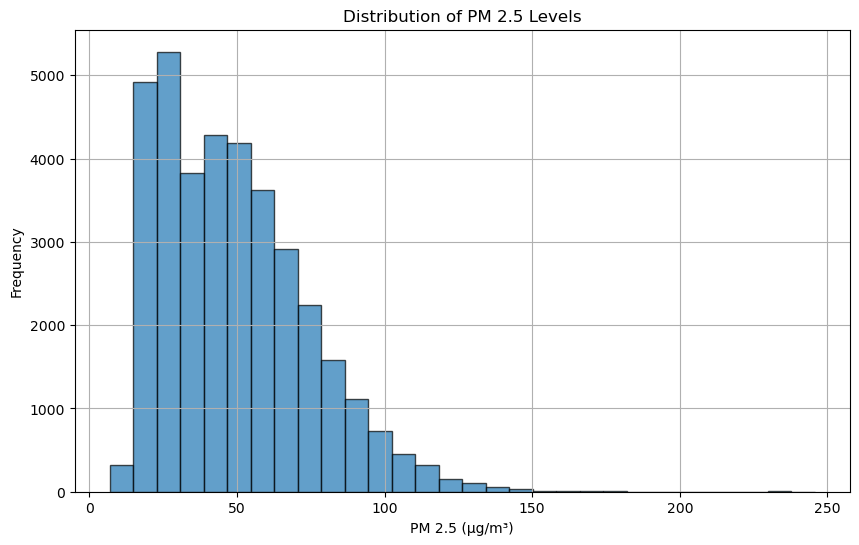

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(data['PM2.5'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of PM 2.5 Levels')
plt.xlabel('PM 2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Box plot of PM2.5 levels by month

<Figure size 1000x600 with 0 Axes>

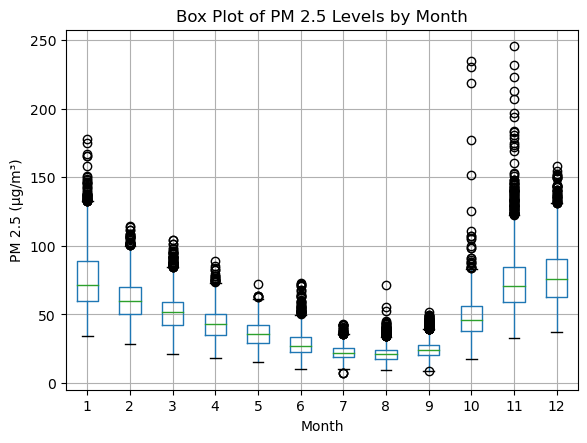

In [28]:
# Box plot of PM2.5 levels by month
plt.figure(figsize=(10, 6))
data.boxplot(column='PM2.5', by='Month', grid=True)
plt.title('Box Plot of PM 2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('PM 2.5 (µg/m³)')
plt.suptitle('')
plt.show()

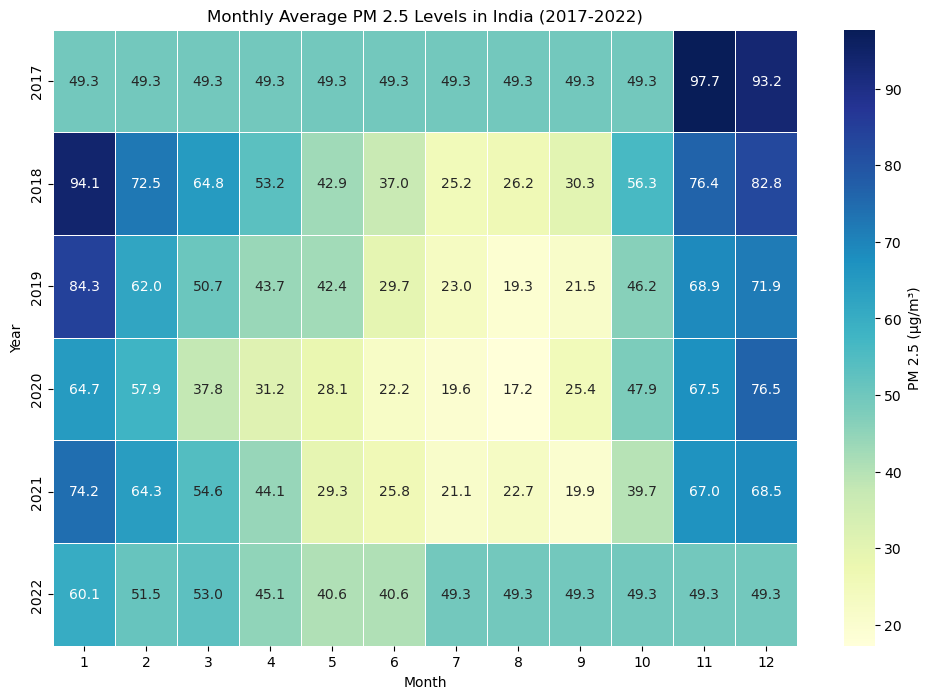

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_avg_filled, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'PM 2.5 (µg/m³)'})
plt.title('Monthly Average PM 2.5 Levels in India (2017-2022)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

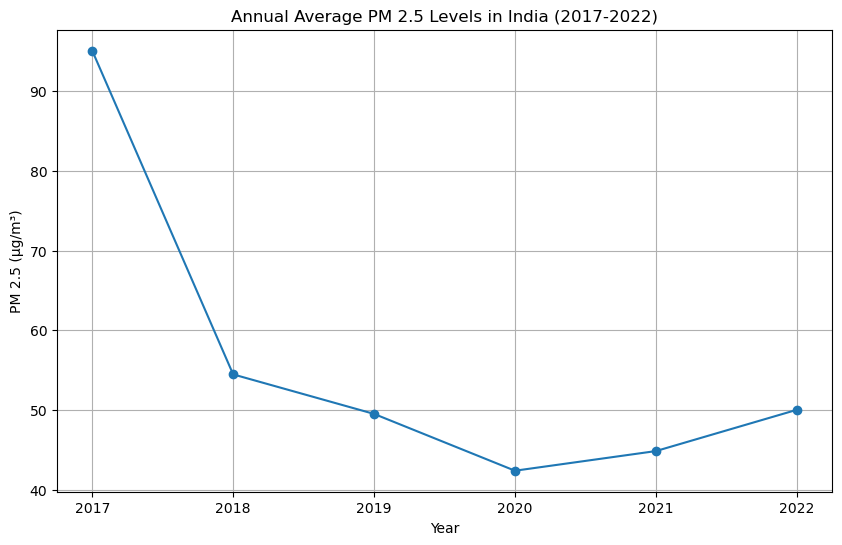

In [28]:
# Line plot for annual trends
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(annual_avg.index, annual_avg.values, marker='o')  # Plotting the data
plt.title('Annual Average PM 2.5 Levels in India (2017-2022)')  # Title of the plot
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('PM 2.5 (µg/m³)')  # Label for the y-axis
plt.grid(True)  # Display grid lines
plt.show()  # Display the plot

In [30]:
# Assuming 'data' contains the PM2.5 data with columns: 'Day', 'Month', 'PM2.5'

# Create a pivot table to aggregate PM2.5 values by day and month
pivot_table = data.pivot_table(index='Month', columns='Day', values='PM2.5', aggfunc='mean')
pivot_table

Day           1          2          3          4          5          6   \
Month                                                                     
1      89.524000  90.629167  83.691750  83.711833  80.174833  78.388673   
2      71.984609  69.519412  65.546636  63.308983  65.469244  64.327667   
3      52.187863  52.931667  51.578559  50.639580  47.366555  46.644622   
4      44.966628  46.237791  47.992766  51.378913  49.897143  46.336238   
5      39.110756  37.398067  36.825217  34.636792  37.300517  38.976609   
6      33.770708  34.319573  33.674035  32.490180  31.085054  30.039080   
7      23.746979  23.316354  21.811667  21.925802  26.549375  27.969545   
8      22.660659  24.185795  23.653976  24.362529  23.541222  22.424118   
9      18.841630  20.172759  20.079688  20.653437  22.800870  23.790267   
10     32.247375  31.240326  32.245778  33.756706  35.000595  37.863871   
11     68.495783  65.900118  67.526790  68.857590  72.621591  72.883021   
12     79.153675  78.148833  81.874052  81.533793  79.378142  76.479561   

Day           7          8          9          10  ...         22         23  \
Month                                              ...                         
1      75.800213  73.316591  76.329787  77.381563  ...  70.386140  66.709829   
2      61.695478  61.282479  61.402417  64.817917  ...  60.134435  57.803929   
3      49.968103  50.868803  51.532627  50.858624  ...  48.393000  50.555847   
4      43.176931  41.482407  44.207714  43.790000  ...  38.964454  39.881111   
5      40.045536  40.223839  39.734052  36.800000  ...  35.627368  34.837174   
6      29.905000  29.105506  29.742750  29.104615  ...  27.697174  27.145978   
7      26.417123  25.798308  24.891129  25.816308  ...  21.119518  21.287625   
8      21.202625  20.685373  20.339333  23.342716  ...  19.595789  20.009167   
9      20.837778  20.707619  22.365926  24.396421  ...  21.952299  22.967241   
10     41.057033  43.660617  43.737872  43.004368  ...  52.388958  53.324062   
11     84.206852  89.184786  87.761167  86.648205  ...  67.114800  68.149684   
12     75.258534  73.913504  75.464118  74.603739  ...  86.065143  86.506636   

Day           24         25         26         27         28         29  \
Month                                                                     
1      70.592759  69.503917  66.200085  69.473246  68.438793  66.115789   
2      55.056250  53.601562  51.023398  49.395847  50.881583  52.165417   
3      51.510167  50.386218  51.423667  53.335000  56.985690  54.384250   
4      41.508362  43.394746  42.420424  40.434054  43.547417  42.914957   
5      33.567143  33.713152  33.866452  31.672022  32.719109  33.185847   
6      25.138854  25.780417  26.099101  23.143125  25.063978  27.073333   
7      21.516706  21.542697  21.134615  21.633511  21.218519  20.792963   
8      19.934881  18.270769  20.351806  21.682603  21.700492  21.540429   
9      23.640899  25.972000  26.789659  27.356304  29.638636  29.124023   
10     52.920842  52.567766  54.678316  61.445745  66.775158  61.119574   
11     75.447227  77.546552  77.036017  71.647434  68.100851  72.761810   
12     86.479492  86.858448  89.166050  81.869252  85.278542  80.584066   

Day           30         31  
Month                        
1      67.168500  73.168793  
2            NaN        NaN  
3      52.984417  49.720333  
4      41.885729        NaN  
5      34.257395  34.278983  
6      25.482043        NaN  
7      21.154079  21.674118  
8      20.811842  19.136667  
9      31.272759        NaN  
10     61.712235  65.071930  
11     75.477373        NaN  
12     79.590526  86.823273  

[12 rows x 31 columns]

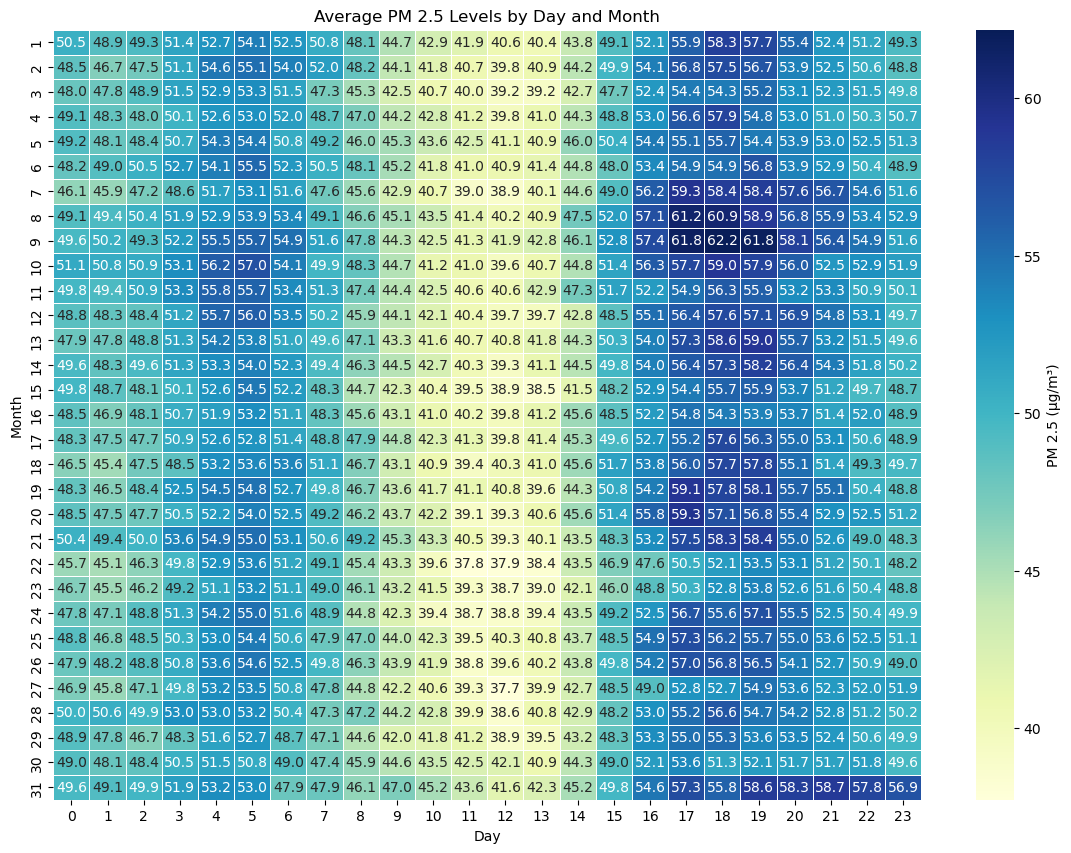

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'PM 2.5 (µg/m³)'})
plt.title('Average PM 2.5 Levels by Day and Month')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()

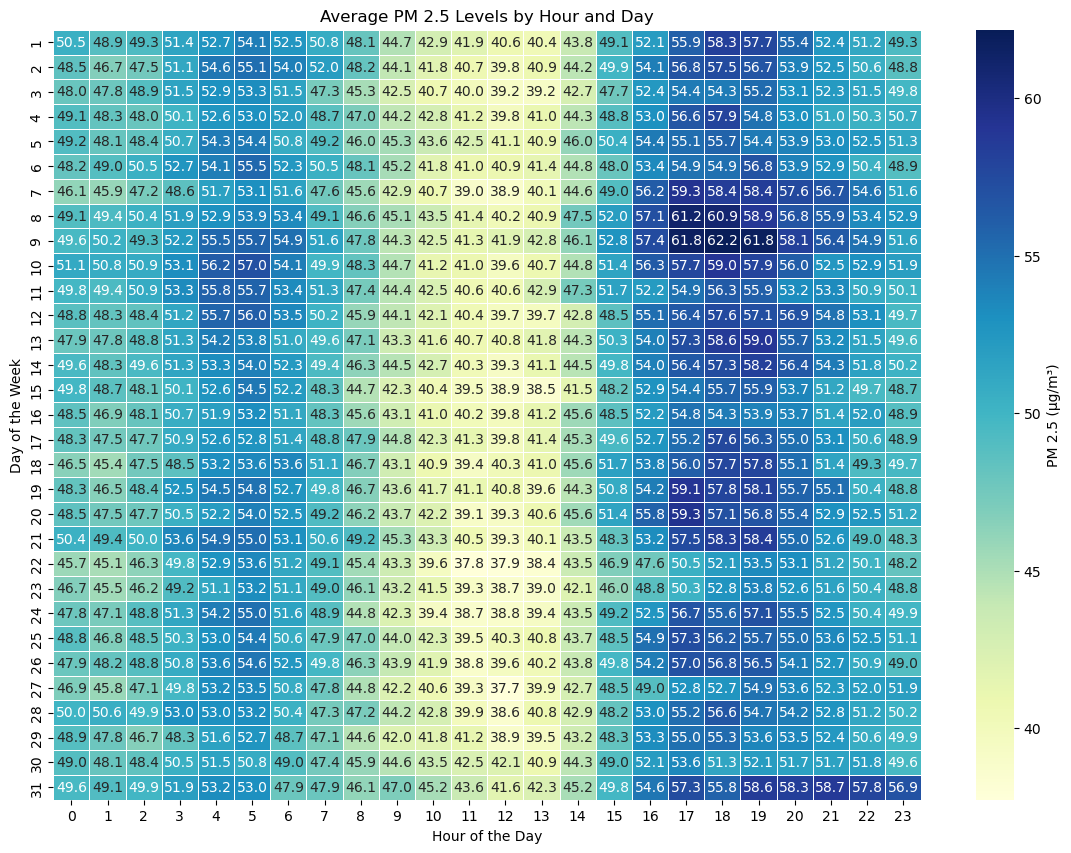

In [32]:
# Assuming 'data' contains the PM2.5 data with columns: 'Hour', 'Day', 'PM2.5'

# Create a pivot table to aggregate PM2.5 values by hour and day
pivot_table = data.pivot_table(index='Day', columns='Hour', values='PM2.5', aggfunc='mean')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'PM 2.5 (µg/m³)'})
plt.title('Average PM 2.5 Levels by Hour and Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

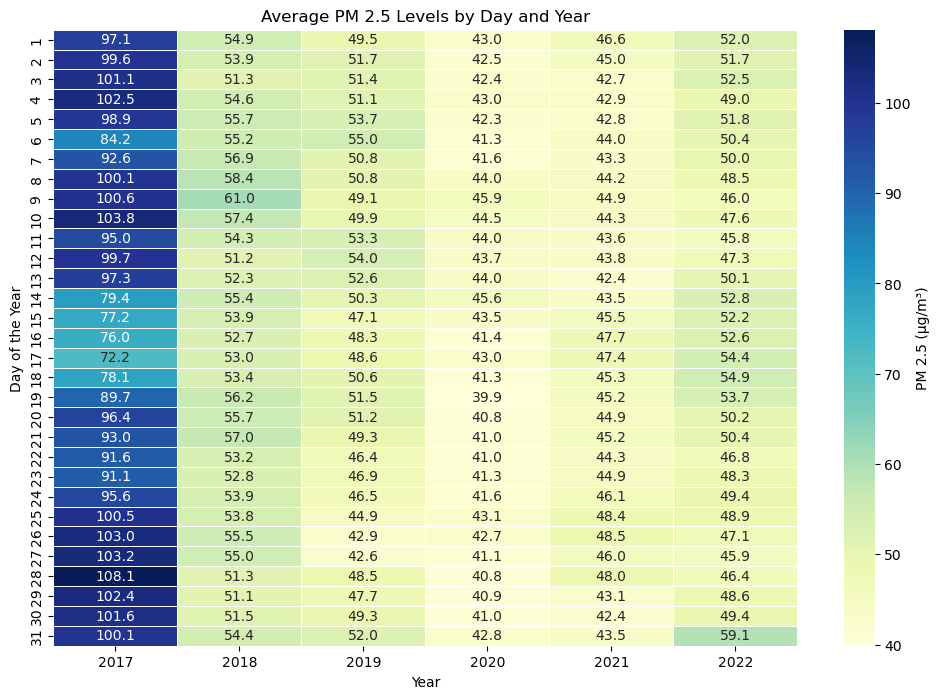

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' contains the PM2.5 data with columns: 'Day', 'Year', 'PM2.5'

# Create a pivot table to aggregate PM2.5 values by day and year
pivot_table = data.pivot_table(index='Day', columns='Year', values='PM2.5', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'PM 2.5 (µg/m³)'})
plt.title('Average PM 2.5 Levels by Day and Year')
plt.xlabel('Year')
plt.ylabel('Day of the Year')
plt.show()

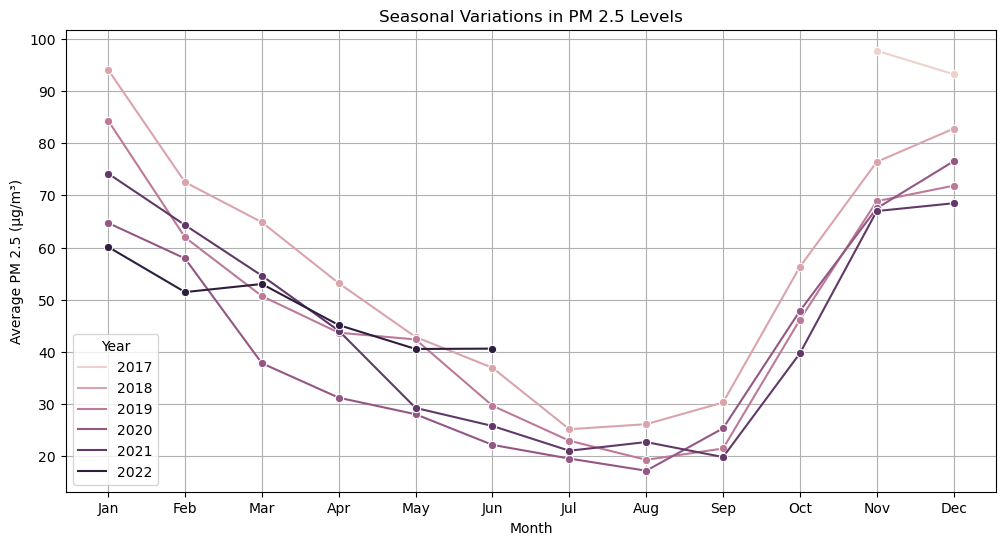


Recommendations:
- Implement stricter emission controls during high pollution months (e.g., Nov-Dec).
- Promote alternative transportation methods to reduce vehicular emissions.
- Increase awareness campaigns on air quality index (AQI) and health advisories.


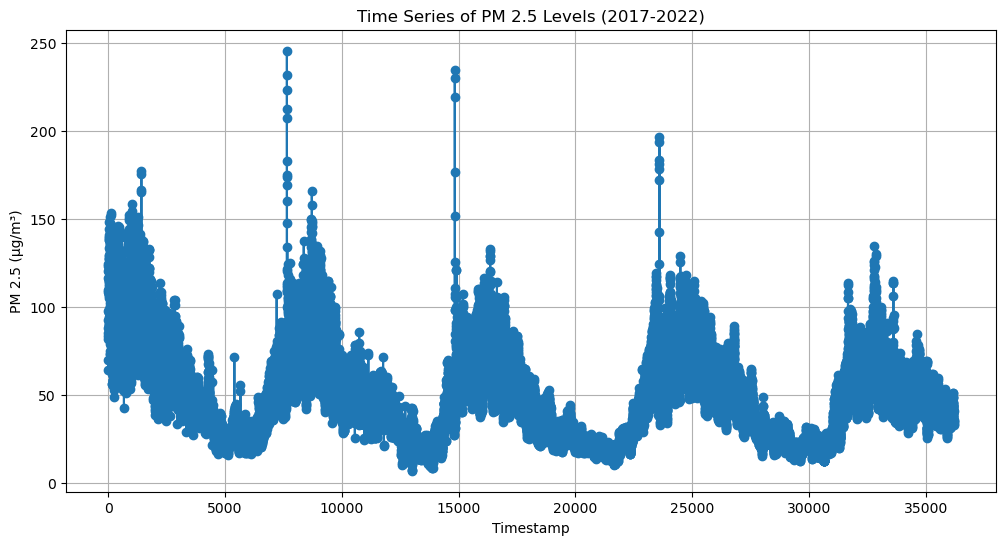

In [47]:
# Calculate monthly averages across all years
monthly_avg = data.groupby(['Year', 'Month'])['PM2.5'].mean().reset_index()

# Plotting Seasonal Variations
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='PM2.5', hue='Year', data=monthly_avg, marker='o')
plt.title('Seasonal Variations in PM 2.5 Levels')
plt.xlabel('Month')
plt.ylabel('Average PM 2.5 (µg/m³)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year')
plt.show()

# Example recommendations based on analysis
print("\nRecommendations:")
print("- Implement stricter emission controls during high pollution months (e.g., Nov-Dec).")
print("- Promote alternative transportation methods to reduce vehicular emissions.")
print("- Increase awareness campaigns on air quality index (AQI) and health advisories.")

# Importance of Continuous Monitoring
# Example: Plotting time series trends
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PM2.5'], marker='o', linestyle='-')
plt.title('Time Series of PM 2.5 Levels (2017-2022)')
plt.xlabel('Timestamp')
plt.ylabel('PM 2.5 (µg/m³)')
plt.grid(True)
plt.show()


# Analyze how PM2.5 levels vary from year to year code

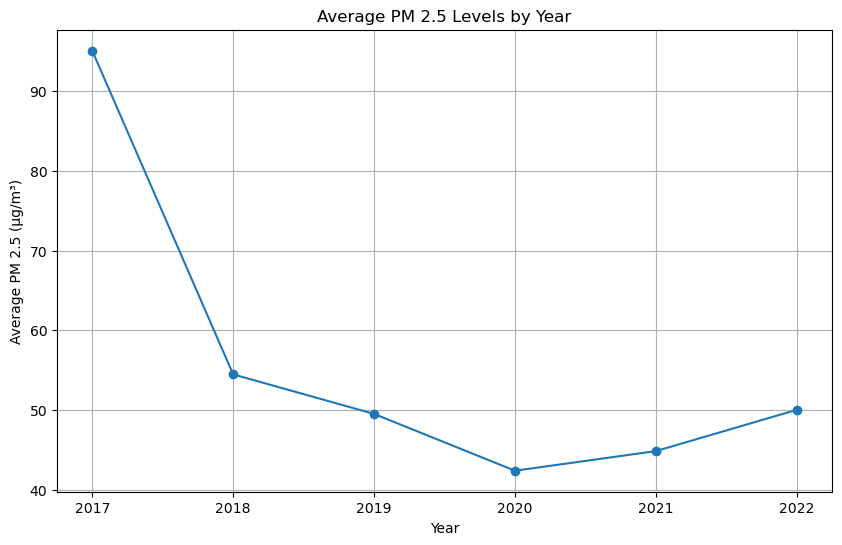

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing PM2.5 data with columns: Timestamp, Year, Month, Day, Hour, PM2.5

# Group data by 'Year' and calculate the average PM2.5 level for each year
yearly_avg = data.groupby('Year')['PM2.5'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-')
plt.title('Average PM 2.5 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Average PM 2.5 (µg/m³)')
plt.grid(True)
plt.xticks(yearly_avg.index)
plt.show()

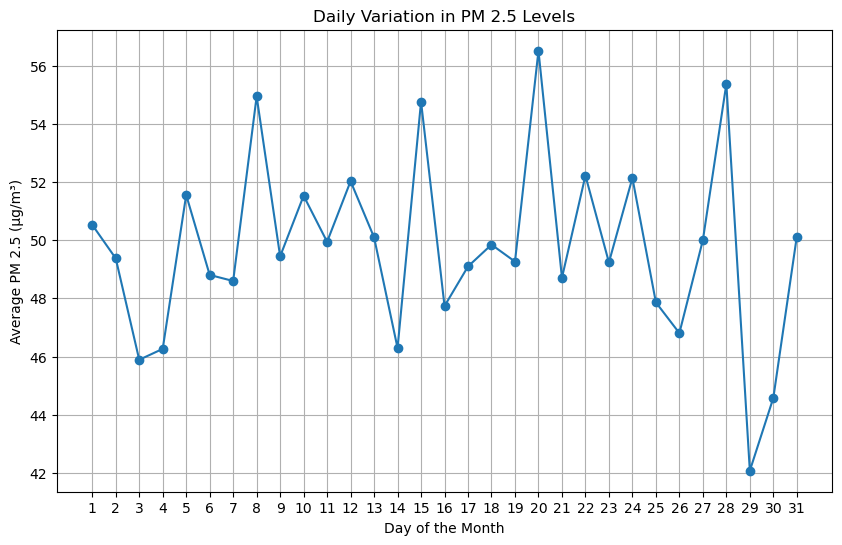

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing PM2.5 data with columns: Timestamp, Year, Month, Day, Hour, PM2.5

# Group data by 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby('Day')['PM2.5'].mean()

# Plotting the daily variation
plt.figure(figsize=(10, 6))
plt.plot(daily_avg.index, daily_avg.values, marker='o', linestyle='-')
plt.title('Daily Variation in PM 2.5 Levels')
plt.xlabel('Day of the Month')
plt.ylabel('Average PM 2.5 (µg/m³)')
plt.grid(True)
plt.xticks(range(1, max(daily_avg.index) + 1))
plt.show()


In [36]:
# Group data by 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby('Day')['PM2.5'].mean()

# Identify the day with the highest average PM2.5 level
most_polluted_day = daily_avg.idxmax()
max_pollution_value = daily_avg.max()

# Identify the day with the lowest average PM2.5 level
least_polluted_day = daily_avg.idxmin()
min_pollution_value = daily_avg.min()

print(f"Most polluted day: Day {most_polluted_day}, Average PM2.5: {max_pollution_value:.2f} µg/m³")
print(f"Least polluted day: Day {least_polluted_day}, Average PM2.5: {min_pollution_value:.2f} µg/m³")


Most polluted day: Day 9, Average PM2.5: 51.71 µg/m³
Least polluted day: Day 22, Average PM2.5: 47.19 µg/m³


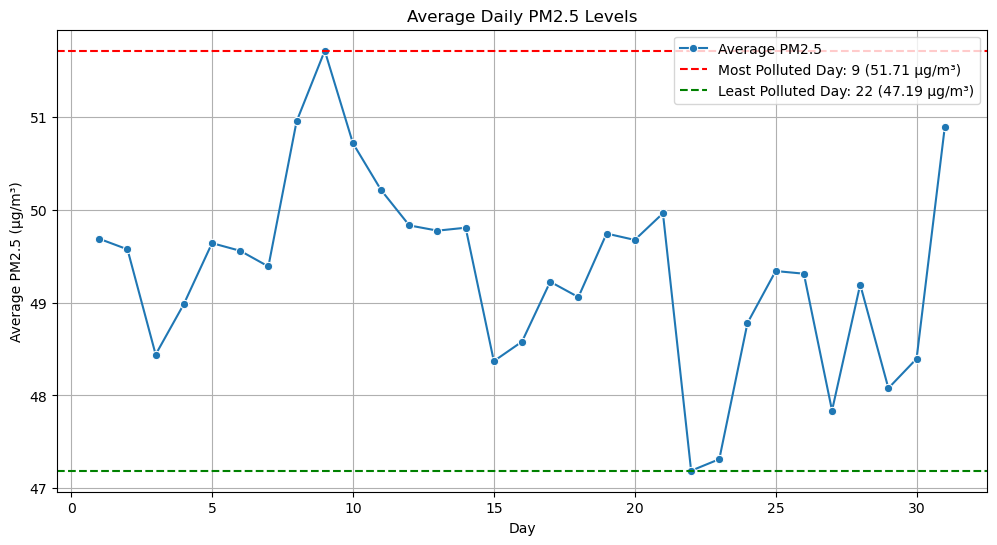

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (replace this with your actual data loading)
# data = pd.read_csv('your_data.csv')
# Assuming your data has columns 'Day' and 'PM2.5'

# Group data by 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby('Day')['PM2.5'].mean()

# Identify the day with the highest average PM2.5 level
most_polluted_day = daily_avg.idxmax()
max_pollution_value = daily_avg.max()

# Identify the day with the lowest average PM2.5 level
least_polluted_day = daily_avg.idxmin()
min_pollution_value = daily_avg.min()

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values, marker='o', label='Average PM2.5')
plt.axhline(y=max_pollution_value, color='r', linestyle='--', label=f'Most Polluted Day: {most_polluted_day} ({max_pollution_value:.2f} µg/m³)')
plt.axhline(y=min_pollution_value, color='g', linestyle='--', label=f'Least Polluted Day: {least_polluted_day} ({min_pollution_value:.2f} µg/m³)')
plt.title('Average Daily PM2.5 Levels')
plt.xlabel('Day')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Group data by 'Year', 'Month', and 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby(['Year', 'Month', 'Day'])['PM2.5'].mean().reset_index()

# Find the row with the highest average PM2.5 level
most_polluted_day = daily_avg.loc[daily_avg['PM2.5'].idxmax()]

# Extract year, month, and day from the result
most_polluted_year = most_polluted_day['Year']
most_polluted_month = most_polluted_day['Month']
most_polluted_day_num = most_polluted_day['Day']
max_pollution_value = most_polluted_day['PM2.5']

print(f"Most polluted day: Year {most_polluted_year}, Month {most_polluted_month}, Day {most_polluted_day_num}, Average PM2.5: {max_pollution_value:.2f} µg/m³")


Most polluted day: Year 2017.0, Month 11.0, Day 12.0, Average PM2.5: 120.35 µg/m³


Most polluted day: Year 2017, Month 11, Day 12, Average PM2.5: 120.35 µg/m³


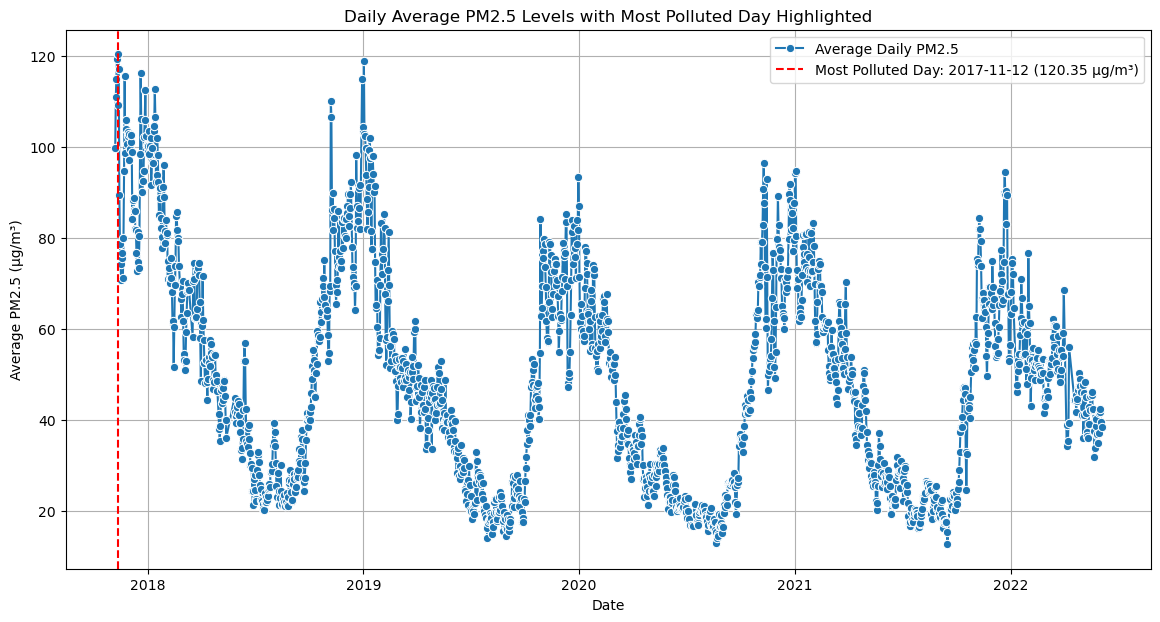

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (replace this with your actual data loading)
# data = pd.read_csv('your_data.csv')
# Assuming your data has columns 'Year', 'Month', 'Day', and 'PM2.5'

# Group data by 'Year', 'Month', and 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby(['Year', 'Month', 'Day'])['PM2.5'].mean().reset_index()

# Find the row with the highest average PM2.5 level
most_polluted_day = daily_avg.loc[daily_avg['PM2.5'].idxmax()]

# Extract year, month, and day from the result
most_polluted_year = int(most_polluted_day['Year'])
most_polluted_month = int(most_polluted_day['Month'])
most_polluted_day_num = int(most_polluted_day['Day'])
max_pollution_value = most_polluted_day['PM2.5']

print(f"Most polluted day: Year {most_polluted_year}, Month {most_polluted_month}, Day {most_polluted_day_num}, Average PM2.5: {max_pollution_value:.2f} µg/m³")

# Visualization
plt.figure(figsize=(14, 7))
sns.lineplot(x=pd.to_datetime(daily_avg[['Year', 'Month', 'Day']]), y=daily_avg['PM2.5'], marker='o', label='Average Daily PM2.5')
plt.axvline(x=pd.Timestamp(year=most_polluted_year, month=most_polluted_month, day=most_polluted_day_num), color='r', linestyle='--', label=f'Most Polluted Day: {most_polluted_year}-{most_polluted_month}-{most_polluted_day_num} ({max_pollution_value:.2f} µg/m³)')
plt.title('Daily Average PM2.5 Levels with Most Polluted Day Highlighted')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# Group data by 'Year', 'Month', and 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby(['Year', 'Month', 'Day'])['PM2.5'].mean().reset_index()

# Find the row with the lowest average PM2.5 level
least_polluted_day = daily_avg.loc[daily_avg['PM2.5'].idxmin()]

# Extract year, month, and day from the result
least_polluted_year = least_polluted_day['Year']
least_polluted_month = least_polluted_day['Month']
least_polluted_day_num = least_polluted_day['Day']
min_pollution_value = least_polluted_day['PM2.5']

print(f"Least polluted day: Year {least_polluted_year}, Month {least_polluted_month}, Day {least_polluted_day_num}, Average PM2.5: {min_pollution_value:.2f} µg/m³")


Least polluted day: Year 2021.0, Month 9.0, Day 16.0, Average PM2.5: 12.64 µg/m³


Most polluted day: Year 2017, Month 11, Day 12, Average PM2.5: 120.35 µg/m³
Least polluted day: Year 2021, Month 9, Day 16, Average PM2.5: 12.64 µg/m³


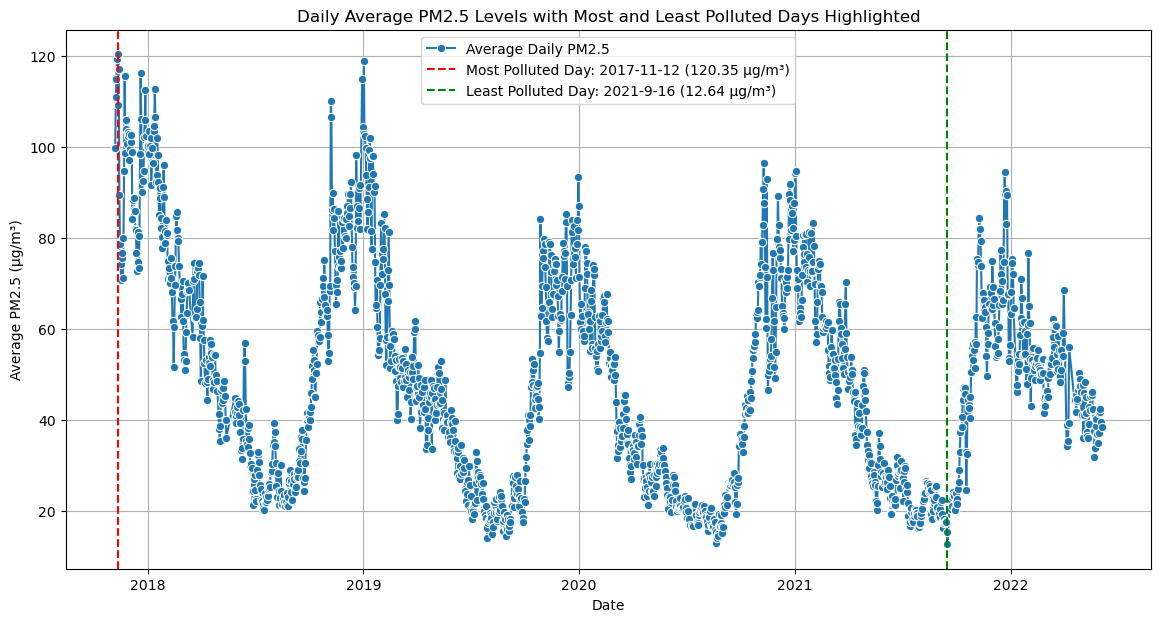

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data creation (replace this with your actual data loading)
# data = pd.read_csv('your_data.csv')
# Assuming your data has columns 'Year', 'Month', 'Day', and 'PM2.5'

# Group data by 'Year', 'Month', and 'Day' and calculate the average PM2.5 level for each day
daily_avg = data.groupby(['Year', 'Month', 'Day'])['PM2.5'].mean().reset_index()

# Find the row with the highest average PM2.5 level
most_polluted_day = daily_avg.loc[daily_avg['PM2.5'].idxmax()]

# Extract year, month, and day from the result
most_polluted_year = int(most_polluted_day['Year'])
most_polluted_month = int(most_polluted_day['Month'])
most_polluted_day_num = int(most_polluted_day['Day'])
max_pollution_value = most_polluted_day['PM2.5']

# Find the row with the lowest average PM2.5 level
least_polluted_day = daily_avg.loc[daily_avg['PM2.5'].idxmin()]

# Extract year, month, and day from the result
least_polluted_year = int(least_polluted_day['Year'])
least_polluted_month = int(least_polluted_day['Month'])
least_polluted_day_num = int(least_polluted_day['Day'])
min_pollution_value = least_polluted_day['PM2.5']

print(f"Most polluted day: Year {most_polluted_year}, Month {most_polluted_month}, Day {most_polluted_day_num}, Average PM2.5: {max_pollution_value:.2f} µg/m³")
print(f"Least polluted day: Year {least_polluted_year}, Month {least_polluted_month}, Day {least_polluted_day_num}, Average PM2.5: {min_pollution_value:.2f} µg/m³")

# Visualization
plt.figure(figsize=(14, 7))
sns.lineplot(x=pd.to_datetime(daily_avg[['Year', 'Month', 'Day']]), y=daily_avg['PM2.5'], marker='o', label='Average Daily PM2.5')
plt.axvline(x=pd.Timestamp(year=most_polluted_year, month=most_polluted_month, day=most_polluted_day_num), color='r', linestyle='--', label=f'Most Polluted Day: {most_polluted_year}-{most_polluted_month}-{most_polluted_day_num} ({max_pollution_value:.2f} µg/m³)')
plt.axvline(x=pd.Timestamp(year=least_polluted_year, month=least_polluted_month, day=least_polluted_day_num), color='g', linestyle='--', label=f'Least Polluted Day: {least_polluted_year}-{least_polluted_month}-{least_polluted_day_num} ({min_pollution_value:.2f} µg/m³)')
plt.title('Daily Average PM2.5 Levels with Most and Least Polluted Days Highlighted')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Group data by 'Year', 'Month', 'Day', and 'Hour' and calculate the average PM2.5 level for each hour
hourly_avg = data.groupby(['Year', 'Month', 'Day', 'Hour'])['PM2.5'].mean().reset_index()

# Find the row with the highest average PM2.5 level
highest_pollution_hour = hourly_avg.loc[hourly_avg['PM2.5'].idxmax()]

# Extract year, month, day, and hour from the result
highest_pollution_year = highest_pollution_hour['Year']
highest_pollution_month = highest_pollution_hour['Month']
highest_pollution_day = highest_pollution_hour['Day']
highest_pollution_hour_num = highest_pollution_hour['Hour']
max_pollution_value = highest_pollution_hour['PM2.5']

print(f"Highest pollution hour: Year {highest_pollution_year}, Month {highest_pollution_month}, Day {highest_pollution_day}, Hour {highest_pollution_hour_num}, Average PM2.5: {max_pollution_value:.2f} µg/m³")


Highest pollution hour: Year 2018.0, Month 11.0, Day 7.0, Hour 21.0, Average PM2.5: 245.63 µg/m³


In [40]:
# Find the row with the lowest average PM2.5 level
lowest_pollution_hour = hourly_avg.loc[hourly_avg['PM2.5'].idxmin()]

# Extract year, month, day, and hour from the result
lowest_pollution_year = lowest_pollution_hour['Year']
lowest_pollution_month = lowest_pollution_hour['Month']
lowest_pollution_day = lowest_pollution_hour['Day']
lowest_pollution_hour_num = lowest_pollution_hour['Hour']
min_pollution_value = lowest_pollution_hour['PM2.5']

print(f"Lowest pollution hour: Year {lowest_pollution_year}, Month {lowest_pollution_month}, Day {lowest_pollution_day}, Hour {lowest_pollution_hour_num}, Average PM2.5: {min_pollution_value:.2f} µg/m³")


Lowest pollution hour: Year 2019.0, Month 7.0, Day 13.0, Hour 9.0, Average PM2.5: 7.02 µg/m³


In [34]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing PM2.5 data with columns: 'Year', 'Month', 'Day', 'PM2.5'

# Filter data for years 2018-2021
df_filtered = data[(data["Year"] >= 2018) & (data["Year"] <= 2021)]

# Loop through every month (1 to 12)
for month in range(1, 13):
    df_month = df_filtered[df_filtered["Month"] == month]

    # Create histogram plot using Plotly Express
    fig = px.histogram(df_month, x="Day", y="PM2.5", color="Year",
                       hover_data=df_month.columns,
                       color_discrete_sequence=px.colors.qualitative.Pastel,
                       title=f"Daily Sum of PM2.5 in Month: {month}/--/2018-2021")

    fig.update_layout(yaxis_range=[0, 11000])
    fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=20))

    # Show the plot
    fig.show()


In [35]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing PM2.5 data with columns: 'Year', 'Month', 'Hour', 'PM2.5'

# Loop through all years in dataset (2017 to 2022)
for year in range(2017, 2023):
    df_year = data[data["Year"] == year]

    # Create histogram plot using Plotly Express
    fig = px.histogram(df_year, x="Hour", y="PM2.5", color="Month",
                       hover_data=df_year.columns,
                       color_discrete_sequence=px.colors.qualitative.Set3,
                       title=f"Total Sum of PM2.5 in Year: {year} by Hour")

    fig.update_layout(yaxis_range=[0, 21000])
    fig.update_layout(template="plotly_dark", font=dict(family="PT Sans", size=20))

    # Show the plot
    fig.show()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



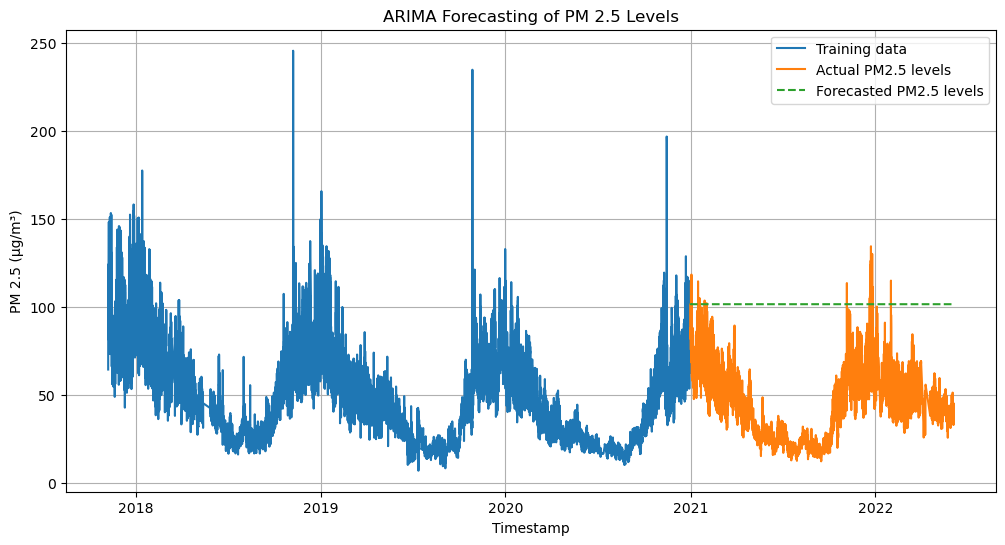

In [74]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

# Split data into train and test sets
train_data = data.loc['2017':'2020', 'PM2.5']
test_data = data.loc['2021':'2022', 'PM2.5']

# Fit ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))  # Example order, tune parameters as needed
arima_model = model.fit()

# Forecast future PM2.5 levels
forecast = arima_model.forecast(steps=len(test_data))

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training data')
plt.plot(test_data.index, test_data, label='Actual PM2.5 levels')
plt.plot(test_data.index, forecast, label='Forecasted PM2.5 levels', linestyle='--')
plt.title('ARIMA Forecasting of PM 2.5 Levels')
plt.xlabel('Timestamp')
plt.ylabel('PM 2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()